<a href="https://colab.research.google.com/github/csabiu/cosmology-class/blob/main/GR_Friedmann_Eqns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install einsteinpy

     |████████████████████████████████| 88 kB 4.7 MB/s 


In [ ]:
import sympy
from sympy import Symbol, Function
from einsteinpy.symbolic import *
from sympy import symbols, sin, cos, sinh, pi, gamma,oo
sympy.init_printing()  # enables the best printing available in an environment

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from einsteinpy.symbolic.predefined import Schwarzschild
from einsteinpy.utils import scalar_factor, scalar_factor_derivative

In [ ]:
syms = sympy.symbols('t r theta phi')
t = Symbol('t')
a = Function('a')(t)
r = Symbol('r')
th = Symbol('theta')
ph = Symbol('pi')
k = Symbol('k')
c = Symbol('c')

H = Function('H')(t)


# define the metric for 3d spherical coordinates
metric = [[0 for i in range(4)] for i in range(4)]
metric[0][0] = c**2
metric[1][1] = -a**2 /(1-k*r**2)
metric[2][2] = -a**2*r**2
metric[3][3] = -a**2*r**2*sympy.sin(th)**2
# creating metric object
m_obj = MetricTensor(metric, syms[:4])
m_obj.tensor()

⎡ 2                                          ⎤
⎢c       0           0              0        ⎥
⎢                                            ⎥
⎢       2                                    ⎥
⎢     -a (t)                                 ⎥
⎢0   ──────────      0              0        ⎥
⎢         2                                  ⎥
⎢    - k⋅r  + 1                              ⎥
⎢                                            ⎥
⎢                  2  2                      ⎥
⎢0       0       -r ⋅a (t)          0        ⎥
⎢                                            ⎥
⎢                             2  2       2   ⎥
⎣0       0           0      -r ⋅a (t)⋅sin (θ)⎦

In [ ]:
# calculate the crhistoffel symbols

ch = ChristoffelSymbols.from_metric(m_obj)
# ch.tensor()
ch.tensor()

⎡⎡0         0                0                     0            ⎤             
⎢⎢                                                              ⎥  ⎡          
⎢⎢         d                                                    ⎥  ⎢          
⎢⎢    a(t)⋅──(a(t))                                             ⎥  ⎢          
⎢⎢         dt                                                   ⎥  ⎢          
⎢⎢0  ───────────────         0                     0            ⎥  ⎢          
⎢⎢    2 ⎛     2    ⎞                                            ⎥  ⎢          
⎢⎢   c ⋅⎝- k⋅r  + 1⎠                                            ⎥  ⎢          
⎢⎢                                                              ⎥  ⎢ ⎛   2    
⎢⎢                     2      d                                 ⎥  ⎢-⎝k⋅r  - 1
⎢⎢                    r ⋅a(t)⋅──(a(t))                          ⎥  ⎢          
⎢⎢                            dt                                ⎥  ⎢──────────
⎢⎢0         0         ────────────────             0

In [ ]:
# This expression is quite ugly. Let's simplify it with the dot notation: 
a_d = Function('\dot{a}')(t)
a_dd = Function('\ddot{a}')(t)
alias = {a.diff(t):a_d, a.diff(t).diff(t):a_dd,a.diff(t)/a:H } # and higher derivatives etc..

ch.tensor().subs(alias)
# better,no?

⎡⎡0         0                 0                       0             ⎤  ⎡      
⎢⎢                                                                  ⎥  ⎢      
⎢⎢   \dot{a}(t)⋅a(t)                                                ⎥  ⎢      
⎢⎢0  ───────────────          0                       0             ⎥  ⎢      
⎢⎢    2 ⎛     2    ⎞                                                ⎥  ⎢      
⎢⎢   c ⋅⎝- k⋅r  + 1⎠                                                ⎥  ⎢      
⎢⎢                                                                  ⎥  ⎢ ⎛   2
⎢⎢                     2                                            ⎥  ⎢-⎝k⋅r 
⎢⎢                    r ⋅\dot{a}(t)⋅a(t)                            ⎥  ⎢──────
⎢⎢0         0         ──────────────────              0             ⎥  ⎢      
⎢⎢                             2                                    ⎥  ⎢    - 
⎢⎢                            c                                     ⎥  ⎢      
⎢⎢                                                  

In [ ]:
# Calculate the Riemann Curvature tensor:

rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor().subs(alias)


⎡                                                                             
⎢                                      ⎡                  -\ddot{a}(t)⋅a(t)   
⎢                                      ⎢       0          ──────────────────  
⎢                                      ⎢                     2 ⎛   2    ⎞     
⎢           ⎡0  0  0  0⎤               ⎢                    c ⋅⎝k⋅r  - 1⎠     
⎢           ⎢          ⎥               ⎢                                      
⎢           ⎢0  0  0  0⎥               ⎢\ddot{a}(t)⋅a(t)                      
⎢           ⎢          ⎥               ⎢────────────────          0           
⎢           ⎢0  0  0  0⎥               ⎢  2 ⎛   2    ⎞                        
⎢           ⎢          ⎥               ⎢ c ⋅⎝k⋅r  - 1⎠                        
⎢           ⎣0  0  0  0⎦               ⎢                                      
⎢                                      ⎢       0                  0           
⎢                                      ⎢            

In [ ]:
# Calculating Riemann Tensor from Metric Tensor
rm2 = RiemannCurvatureTensor.from_metric(m_obj)
rm2.tensor().subs(alias)

⎡                                                                             
⎢                                      ⎡                  -\ddot{a}(t)⋅a(t)   
⎢                                      ⎢       0          ──────────────────  
⎢                                      ⎢                     2 ⎛   2    ⎞     
⎢           ⎡0  0  0  0⎤               ⎢                    c ⋅⎝k⋅r  - 1⎠     
⎢           ⎢          ⎥               ⎢                                      
⎢           ⎢0  0  0  0⎥               ⎢\ddot{a}(t)⋅a(t)                      
⎢           ⎢          ⎥               ⎢────────────────          0           
⎢           ⎢0  0  0  0⎥               ⎢  2 ⎛   2    ⎞                        
⎢           ⎢          ⎥               ⎢ c ⋅⎝k⋅r  - 1⎠                        
⎢           ⎣0  0  0  0⎦               ⎢                                      
⎢                                      ⎢       0                  0           
⎢                                      ⎢            

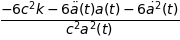

In [ ]:
# Calculating Ricci Scalar from the Metric Tensor


scalar_curvature = RicciScalar.from_metric(m_obj)
RS=scalar_curvature.tensor().subs(alias)
RS

In [ ]:
# Calculating Einstein Tensor from the Metric Tensor
einst = EinsteinTensor.from_metric(m_obj)
einst.tensor().subs(alias)

⎡     2                                       2                               
⎢3.0⋅c ⋅k + 3.0⋅\ddot{a}(t)⋅a(t) + 3.0⋅\dot{a} (t)   3⋅\ddot{a}(t)            
⎢───────────────────────────────────────────────── - ─────────────            
⎢                       2                                 a(t)                
⎢                      a (t)                                                  
⎢                                                                             
⎢                                                                        2    
⎢                                                                   - 2⋅c ⋅k -
⎢                                0                                  ──────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

In [ ]:
# Define a stress Energy Momentum Tensor
d = sympy.symbols('rho')
p = sympy.symbols('p')
mm = sympy.diag(d,-p,-p,-p).tolist()

T = StressEnergyMomentumTensor(mm,syms[:4])
T.tensor()

⎡ρ  0   0   0 ⎤
⎢             ⎥
⎢0  -p  0   0 ⎥
⎢             ⎥
⎢0  0   -p  0 ⎥
⎢             ⎥
⎣0  0   0   -p⎦

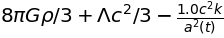

In [ ]:
# looking at the time-time component of the field equations
G = sympy.symbols('G')
L = sympy.symbols('Lambda')
eq1=einst[0,0]-L*m_obj[0,0]-8*pi*G*T[0,0]
eq1.simplify().subs(alias)
H2=eq1-3*(a.diff(t)/a)**2
H2=-H2/3
H2.simplify()
#ad=H2*a**2
#ad.simplify()


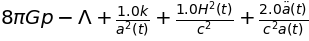

In [ ]:
# looking at the space-space components
eq2=einst[2,2]-L*m_obj[2,2]-8*pi*G*T[2,2]*m_obj[2,2]
eq2.simplify().subs(alias)
#eq2.subs({a.diff(t)**2:ad}).simplify()
eq3=eq2/m_obj[2,2]
eq3.simplify().subs(alias)

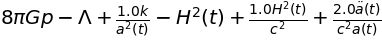

In [ ]:
eq4=eq3-H**2
eq4.simplify().subs(alias)

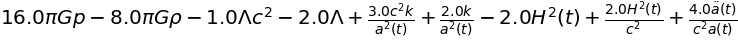

In [ ]:
eq5=(2*eq4-3*H2)
eq5.simplify().subs(alias)

In [ ]:
# w dark energy

In [ ]:
# Define a stress Energy Momentum Tensor
rhom = sympy.symbols('rho_m')
rhox = sympy.symbols('rho_X')
px = sympy.symbols('p_X')
w = sympy.symbols('w')
mm = sympy.diag(rhom+rhox,w*rhox*c**2,w*rhox*c**2,w*rhox*c**2).tolist()

T = StressEnergyMomentumTensor(mm,syms[:4])
T.tensor()


⎡ρ_X + ρₘ     0         0         0    ⎤
⎢                                      ⎥
⎢           2                          ⎥
⎢   0      c ⋅ρ_X⋅w     0         0    ⎥
⎢                                      ⎥
⎢                     2                ⎥
⎢   0         0      c ⋅ρ_X⋅w     0    ⎥
⎢                                      ⎥
⎢                               2      ⎥
⎣   0         0         0      c ⋅ρ_X⋅w⎦

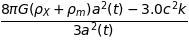

In [ ]:

eq1=einst[0,0]-8*pi*G*T[0,0]
eq1.simplify().subs(alias)
H2=eq1-3*(a.diff(t)/a)**2
H2=-H2/3
H2.simplify()


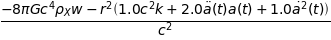

In [ ]:
# looking at the space-space components
eq2=einst[2,2]*m_obj[2,2]-8*pi*G*T[2,2]*m_obj[2,2]
eq2.simplify().subs(alias)
#eq2.subs({a.diff(t)**2:ad}).simplify()
eq3=eq2/m_obj[2,2]
eq3.simplify().subs(alias)

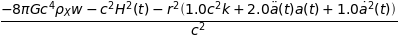

In [ ]:
eq4=eq3-H**2
eq4.simplify().subs(alias)